# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


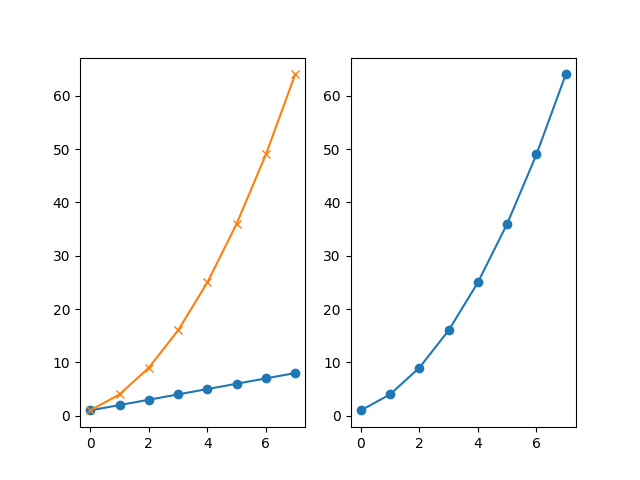

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


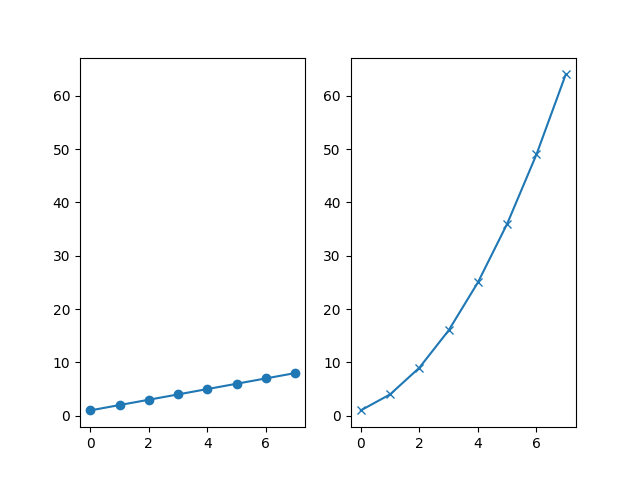

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


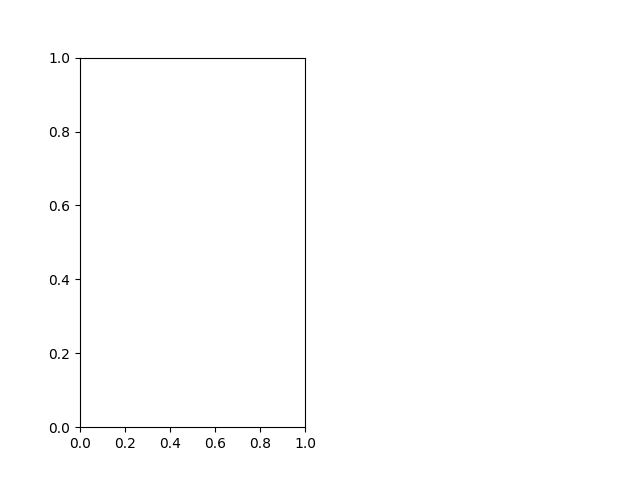

True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


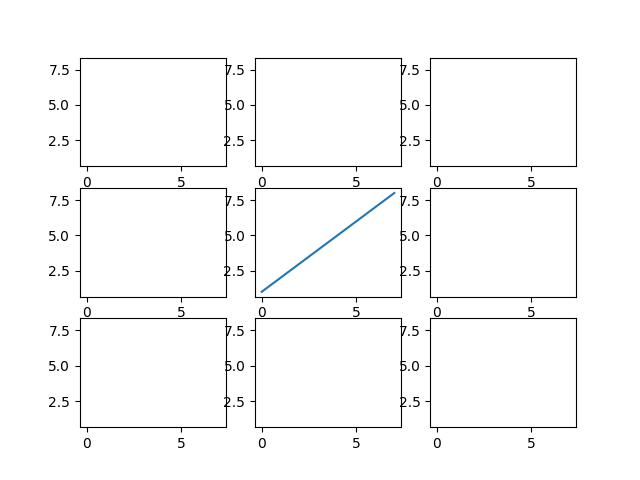

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [8]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [9]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


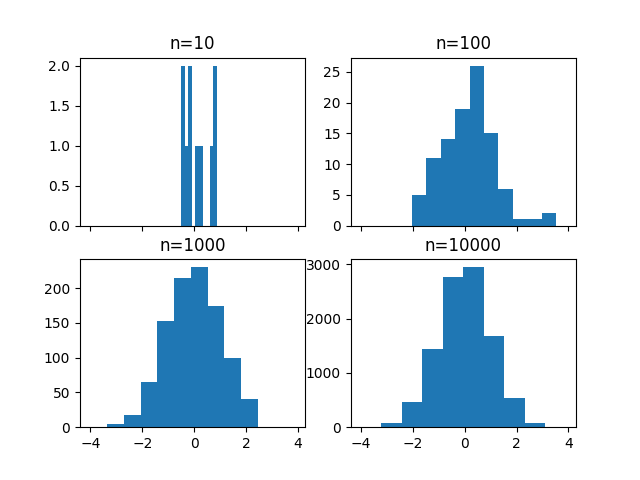

In [10]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


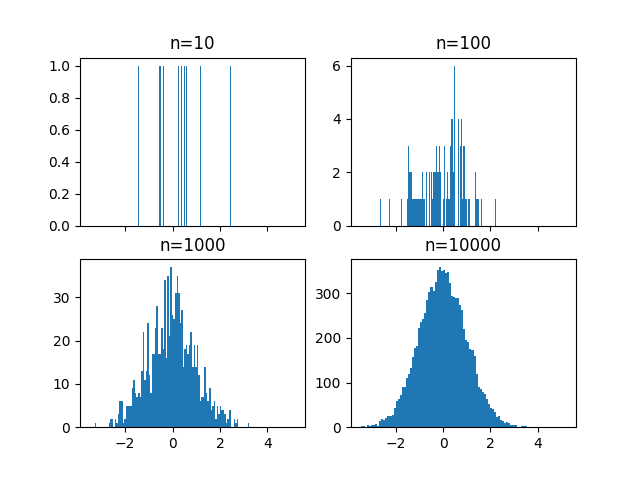

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


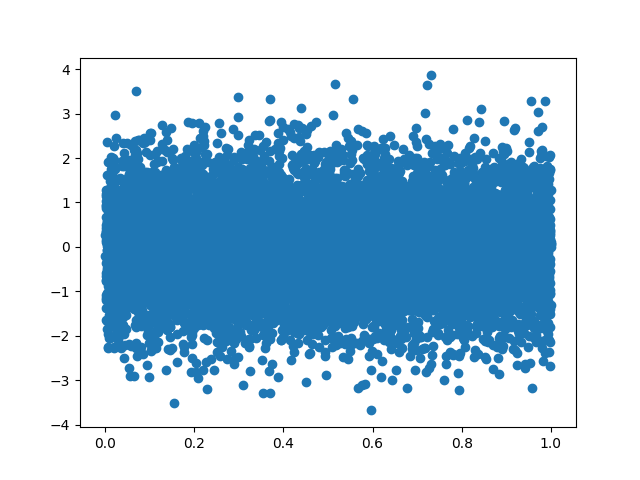

In [12]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


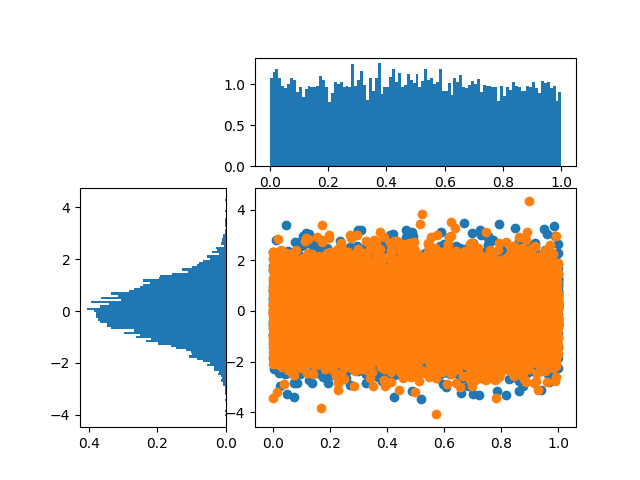

In [13]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [15]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [16]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [25]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [17]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [18]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.004229,-0.015033,0.501469
std,1.409687,1.003965,0.287820
min,0.024565,-4.188054,0.000419
25%,0.963682,-0.690802,0.250334
50%,1.677536,-0.020239,0.503114
75%,2.706628,0.653590,0.752955
max,11.308591,4.013929,0.999986


<IPython.core.display.Javascript object>


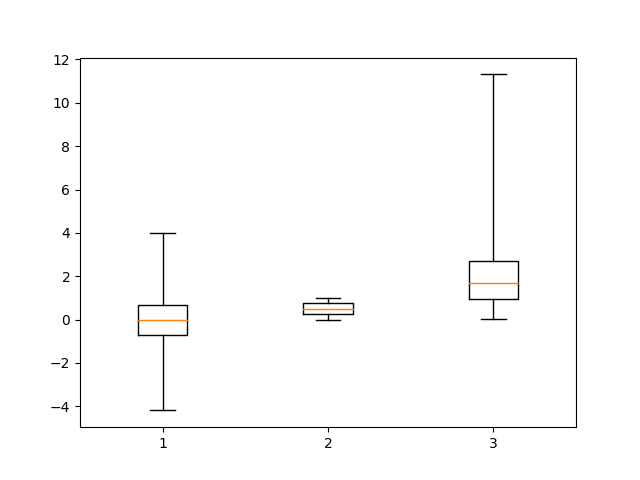

In [19]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [20]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


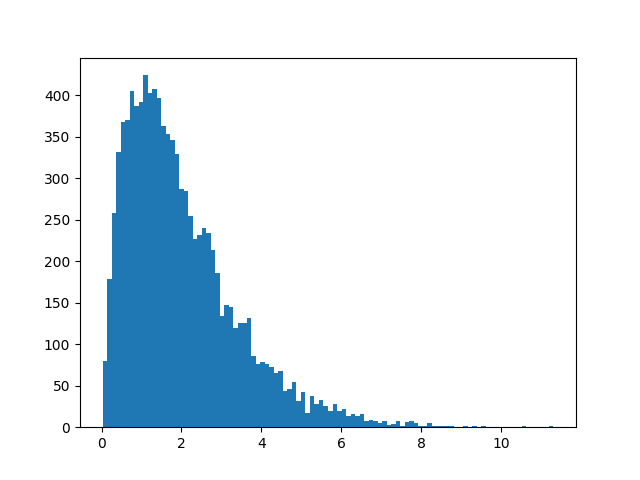

In [21]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


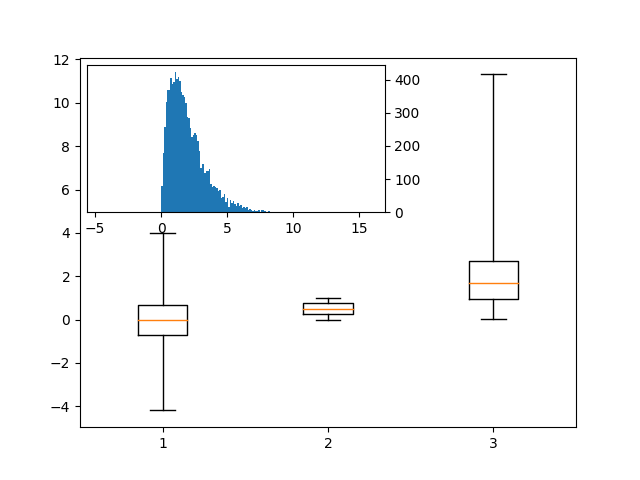

In [22]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [23]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


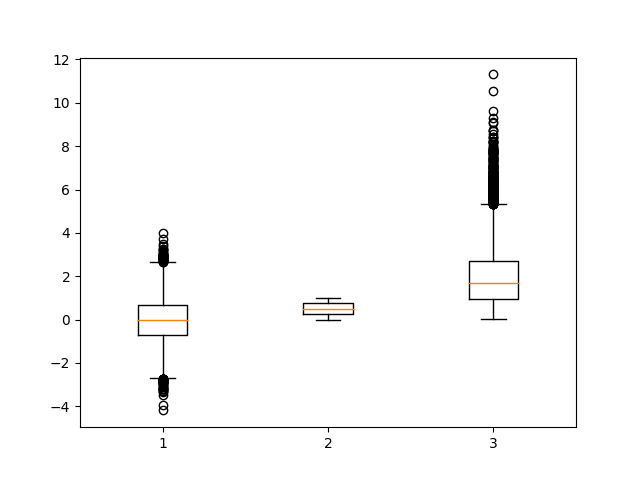

In [24]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


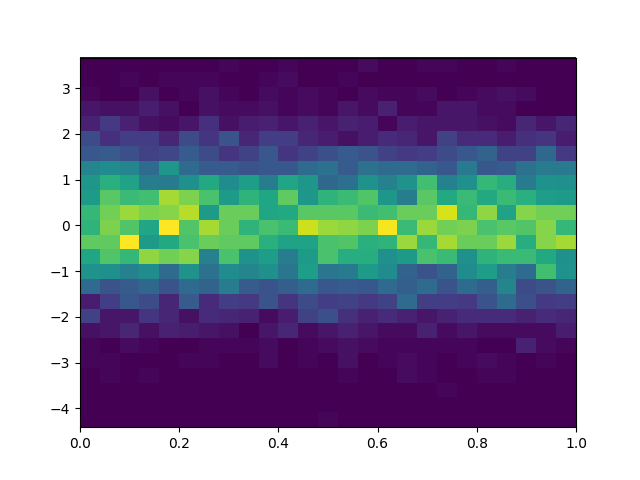

In [34]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


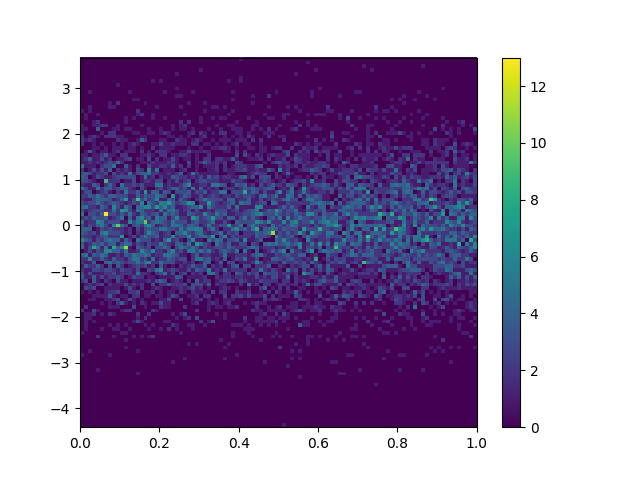

In [35]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [36]:
# add a colorbar legend
plt.colorbar()

<IPython.core.display.Javascript object>


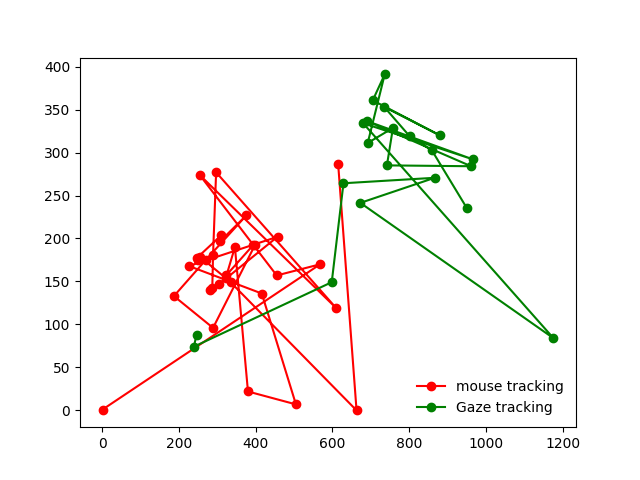

[  1 568 455 254 610 297 289 287 281 305 457 226 416 505 380 346 322 254
 249 246 311 308 376 270 187 289 399 393 323 335 663 615]
[  1 170 157 274 119 277 181 142 140 147 202 168 136   7  22 190 154 179
 175 177 204 197 227 175 133  96 193 192 157 149   0 287]


In [37]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
plt.figure()

# Generate some test data
#x = np.random.rand(10)
x=np.array([1,568,455,254,610,297,289,287,281,305,457,226,416,505,380,346,322,254,249,246,311,308,376,270,187,289,399,393,323,335,663,615])
y=np.array([1,170,157,274,119,277,181,142,140,147,202,168,136,7,22,190,154,179,175,177,204,197,227,175,133,96,193,192,157,149,0,287])
#y = np.random.randn(10)
x1= np.array([246,239,598.33,628.93,866.69,672.89,1176.17,680,965.23,691.23,961.45,742.13,757.8,692.17,736.36,705.18,879.2,735.08,801,859.43,950.25])
y1=np.array([88,74.14,149.17,264.26,270.62,241.44,84,334.17,292.23,336.42,284.06,285.06,328.6,311.17,390.91,360.73,320.2,353.08,319.15,302.45,235.5])
print(x)
print(y)
plt.plot(x,y,'-o',color='red',label='mouse tracking')
plt.plot(x1,y1,'-o',color='green',label='Gaze tracking')
plt.legend(loc=4, frameon=False)


<IPython.core.display.Javascript object>


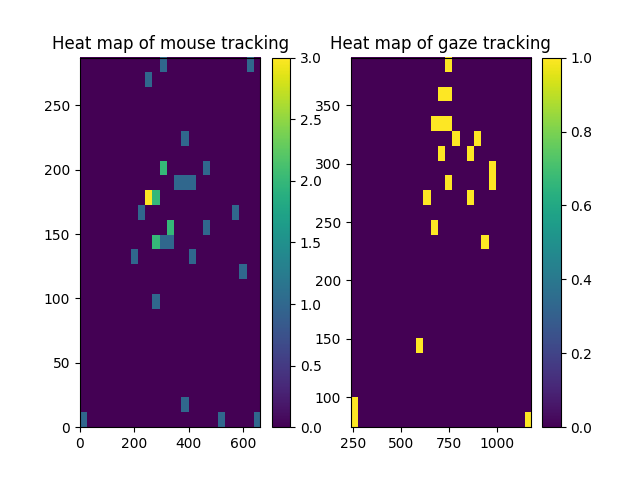

In [45]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
plt.figure()
#fig, ((ax1, ax2)) = plt.subplots(1, 2, sharex=True)
ax1 = plt.subplot(1, 2, 1)
# Generate some test data
x=np.array([1,568,455,254,610,297,289,287,281,305,457,226,416,505,380,346,322,254,249,246,311,308,376,270,187,289,399,393,323,335,663,615])
y=np.array([1,170,157,274,119,277,181,142,140,147,202,168,136,7,22,190,154,179,175,177,204,197,227,175,133,96,193,192,157,149,0,287])
_ = plt.hist2d(x, y, bins=25)



plt.colorbar()
plt.title('Heat map of mouse tracking')

ax2=plt.subplot(1,2,2)
x1= np.array([246,239,598.33,628.93,866.69,672.89,1176.17,680,965.23,691.23,961.45,742.13,757.8,692.17,736.36,705.18,879.2,735.08,801,859.43,950.25])
y1=np.array([88,74.14,149.17,264.26,270.62,241.44,84,334.17,292.23,336.42,284.06,285.06,328.6,311.17,390.91,360.73,320.2,353.08,319.15,302.45,235.5])
_ = plt.hist2d(x1, y1, bins=25)
plt.title('Heat map of gaze tracking')
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.colorbar()
#plt.clf()
#plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.show()

# Animations

In [46]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [47]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


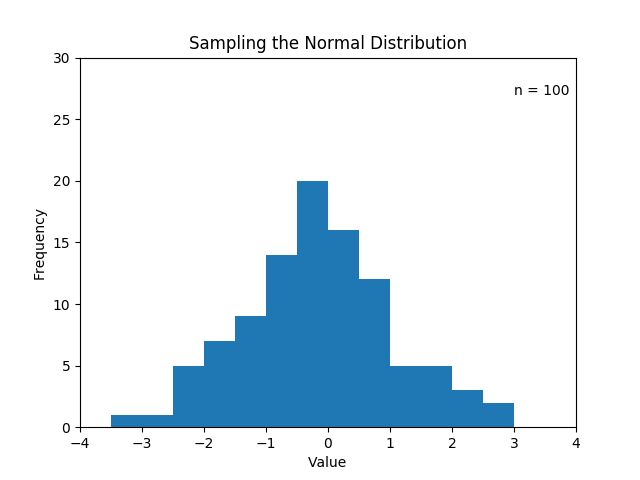

In [48]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

In [ ]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [ ]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

In [ ]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [ ]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)